In [1]:
# Instalando as bibliotecas necessárias
! pip install numpy pandas matplotlib seaborn researchpy imbalanced-learn collections

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import os

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Carregando os dados
df = pd.read_parquet('versao_1_spotify_songs.parquet')# Exibindo as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head().to_string(index=False))

Primeiras linhas do DataFrame:
      track_artist  track_popularity         track_album_id                             track_album_name track_album_release_date                                                                                      playlist_name            playlist_id playlist_genre  playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms    intervalo
       Ray Charles                59 0cw6Sv7IwZ87aLPPvNPSd0 Ray Charles (aka: Hallelujah, I Love Her So)               01/01/1957 The 1950s/1960s/1970s/1980s/1990s/2000s/2010s with pop/r&b/soul/boogie/dance/jazz/hip hop/hop/rap. 1S7BckuYIkEazeNKOSM0uA            r&b urban contemporary         0.565   0.962    8    -2.981     1       0.0640        0.4370            0.0000    0.0560    0.906 148.808       160227 [1957, 1962)
   The Temptations                26 7C4vMPQR8KcbZv4e2ZI0lc                  The Temptations Sing Smokey           

In [4]:
#Excluindo valores nulos
df = df.dropna()
df.isnull().sum()

track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
intervalo                   0
dtype: int64

In [5]:
#Excluindo valores duplicados
df = df.drop_duplicates()

In [6]:
# Converting 'track_popularity' to categorical labels
def classify_popularity(popularity):
    if popularity <= 20:
        return 0
    elif popularity <= 40:
        return 1
    elif popularity <= 60:
        return 2
    else:
        return 3

df['popularity_class'] = df['track_popularity'].apply(classify_popularity)

In [7]:
# Lista das colunas a serem removidas
colunas_para_dropar = [
    'track_artist', 'track_album_id', 'track_album_name',
    'playlist_name', 'playlist_id', 'intervalo'
]

# Remover as colunas do conjunto de dados
df = df.drop(columns=colunas_para_dropar)


In [8]:
df['track_album_release_date']

track_name
Mess Around                                01/01/1957
My Girl                                    01/01/1965
One Bourbon, One Scotch, One Beer          01/01/1966
Gimme Shelter - Mono                       01/01/1966
Paint It, Black - Mono                     01/01/1966
                                              ...    
Lit                                        31/12/2019
No Sleep (feat. Bonn) - DubVision Remix    31/12/2019
memories of her, last winter               31/12/2019
Warrior                                    31/12/2019
Tottenham Tugz                             31/12/2019
Name: track_album_release_date, Length: 30942, dtype: object

In [9]:
# Aplicar o filtro para manter apenas os anos maiores que 2018
df = df[df['track_album_release_date'].str[-4:].astype(int) > 2018]

In [10]:
# Informações gerais sobre o conjunto de dados
print("\nInformações gerais sobre o conjunto de dados:")
info_table = pd.DataFrame({
    'Nome da coluna': df.columns,
    'Tipos de dados': df.dtypes,
    'Valores não nulos': df.notnull().sum(),
    'Valores únicos': df.nunique()
})
print(info_table.to_string(index=False))


Informações gerais sobre o conjunto de dados:
          Nome da coluna Tipos de dados  Valores não nulos  Valores únicos
        track_popularity          int64               9864             101
track_album_release_date         object               9864             368
          playlist_genre         object               9864               6
       playlist_subgenre         object               9864              24
            danceability        float64               9864             706
                  energy        float64               9864             845
                     key          int64               9864              12
                loudness        float64               9864            5293
                    mode          int64               9864               2
             speechiness        float64               9864            1146
            acousticness        float64               9864            2609
        instrumentalness        float64              

In [11]:
# Lista das colunas a serem removidas
colunas_para_dropar = ['track_album_release_date']

# Remover as colunas do conjunto de dados
df = df.drop(columns=colunas_para_dropar)

In [12]:
# Calculando a correlação entre as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

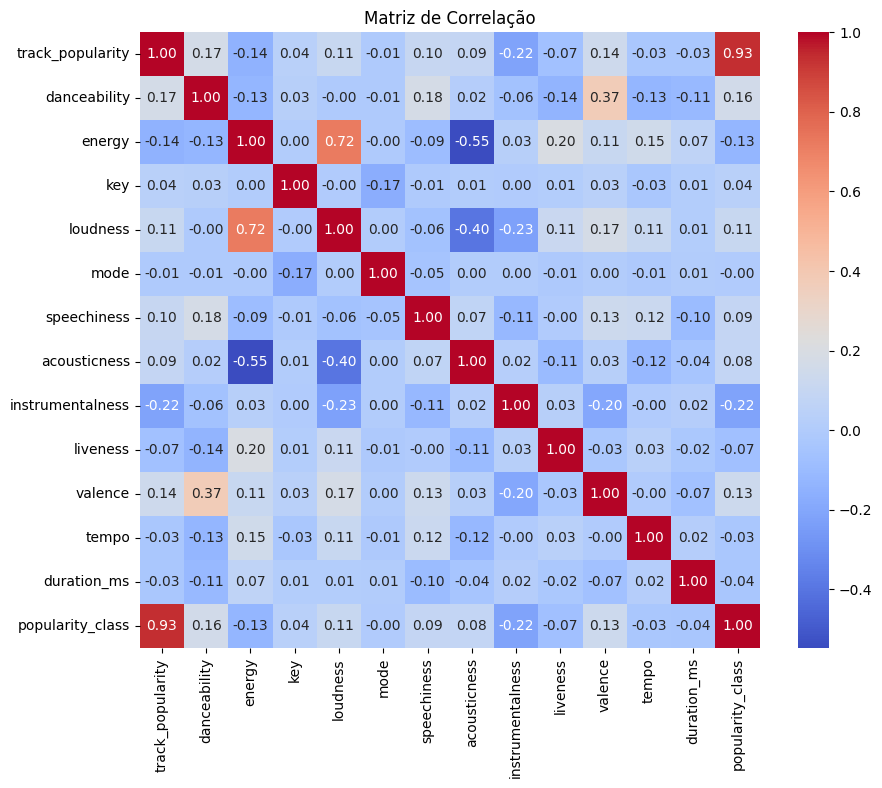

In [13]:
# Exibindo a matriz de correlação em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [14]:
# Analisando a média de popularidade por gênero e subgênero de playlists
relevant_columns = ['track_popularity', 'playlist_genre', 'playlist_subgenre']
df_relevant = df[relevant_columns]

In [15]:
# Calculando a média da popularidade para cada combinação de gênero e subgênero
popularity_mean = df_relevant.groupby(['playlist_genre', 'playlist_subgenre']).mean().reset_index()

In [16]:
# Mostrando as médias de popularidade por combinação de gênero e subgênero
print("Média de Popularidade por Gênero e Subgênero de Playlists:")
print(popularity_mean)

Média de Popularidade por Gênero e Subgênero de Playlists:
   playlist_genre          playlist_subgenre  track_popularity
0             edm                   big room         37.350217
1             edm              electro house         41.522885
2             edm                    pop edm         52.890601
3             edm  progressive electro house         39.981982
4           latin              latin hip hop         67.722527
5           latin                  latin pop         57.562102
6           latin                  reggaeton         64.125592
7           latin                   tropical         44.691275
8             pop                  dance pop         53.051748
9             pop                 electropop         44.629310
10            pop            indie poptimism         50.555556
11            pop              post-teen pop         66.628253
12            r&b                    hip pop         58.586325
13            r&b                   neo soul         44.268

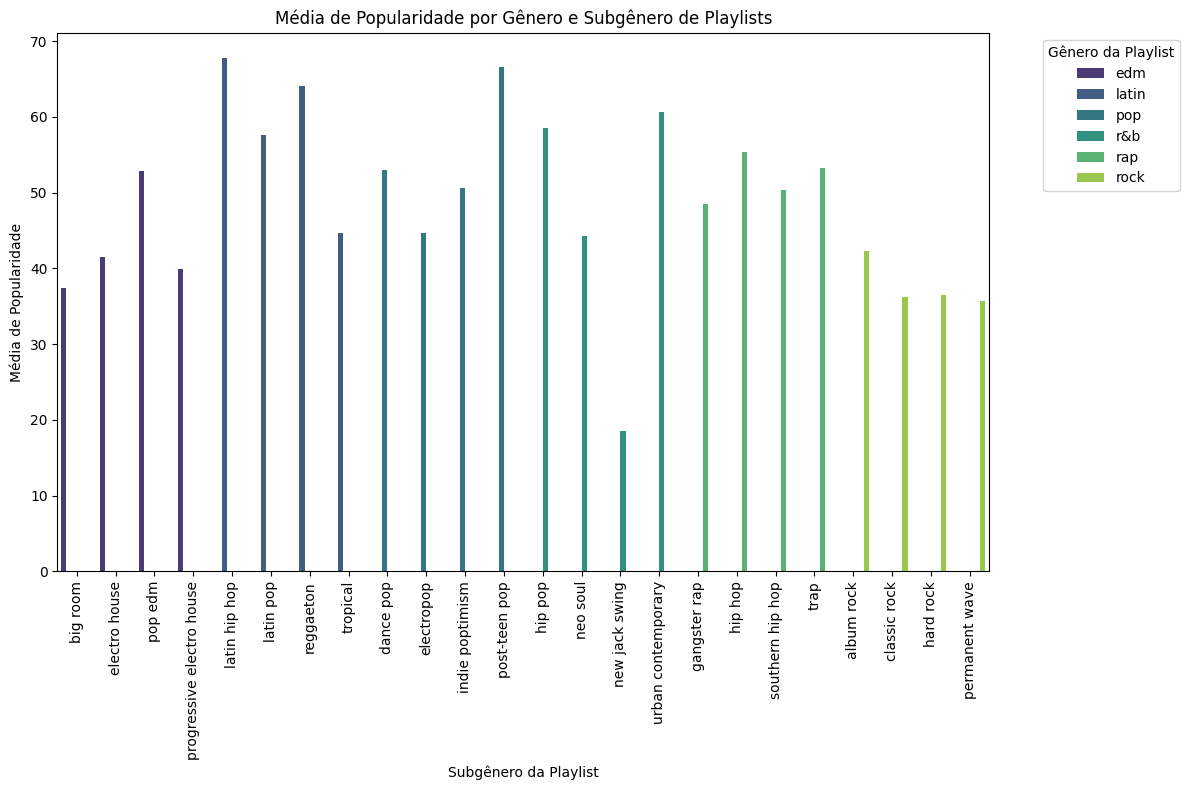

In [17]:
# Visualização da média de popularidade por gênero e subgênero de playlists
plt.figure(figsize=(12, 8))
sns.barplot(data=popularity_mean, x='playlist_subgenre', y='track_popularity', hue='playlist_genre', palette='viridis')
plt.title('Média de Popularidade por Gênero e Subgênero de Playlists')
plt.xlabel('Subgênero da Playlist')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=90)
plt.legend(title='Gênero da Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
# Calculando a média da popularidade para cada combinação de gênero e subgênero
popularity_median = df_relevant.groupby(['playlist_genre', 'playlist_subgenre']).median().reset_index()

In [19]:
# Mostrando as médias de popularidade por combinação de gênero e subgênero
print("Média de Popularidade por Gênero e Subgênero de Playlists:")
print(popularity_mean)

Média de Popularidade por Gênero e Subgênero de Playlists:
   playlist_genre          playlist_subgenre  track_popularity
0             edm                   big room         37.350217
1             edm              electro house         41.522885
2             edm                    pop edm         52.890601
3             edm  progressive electro house         39.981982
4           latin              latin hip hop         67.722527
5           latin                  latin pop         57.562102
6           latin                  reggaeton         64.125592
7           latin                   tropical         44.691275
8             pop                  dance pop         53.051748
9             pop                 electropop         44.629310
10            pop            indie poptimism         50.555556
11            pop              post-teen pop         66.628253
12            r&b                    hip pop         58.586325
13            r&b                   neo soul         44.268

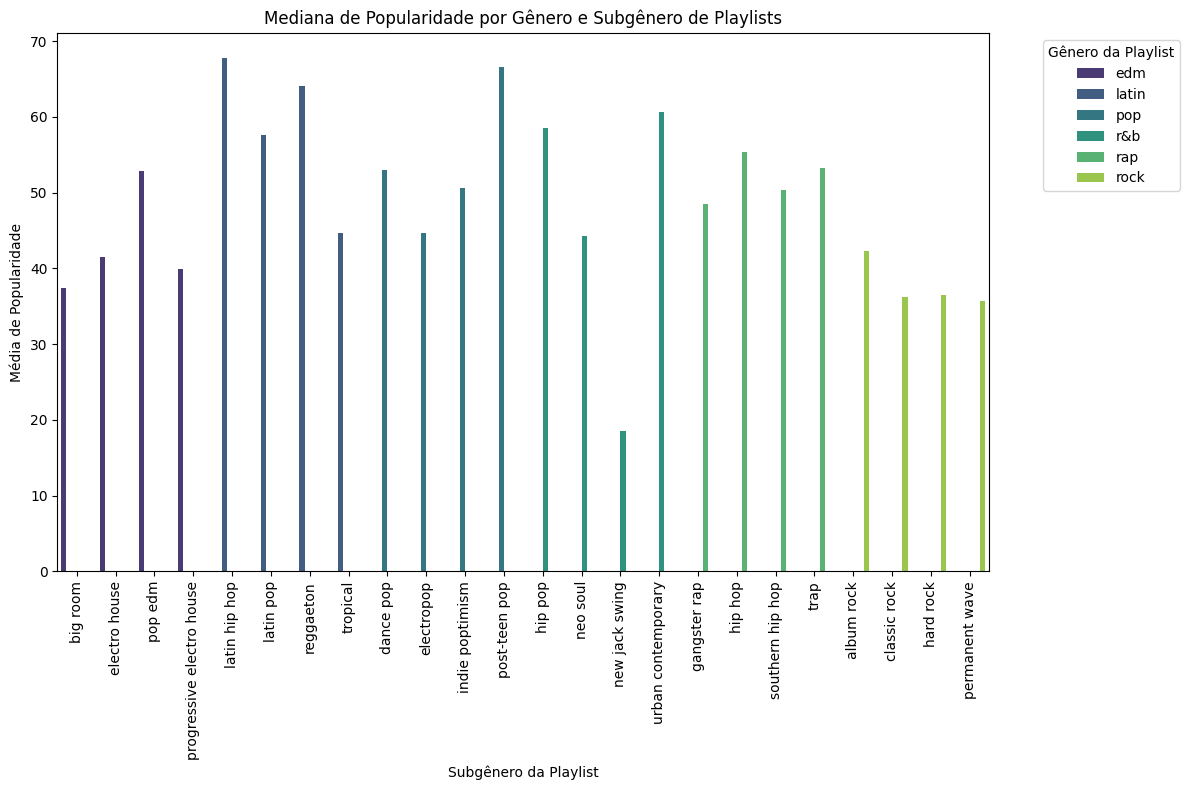

In [20]:
# Visualização da média de popularidade por gênero e subgênero de playlists
plt.figure(figsize=(12, 8))
sns.barplot(data=popularity_mean, x='playlist_subgenre', y='track_popularity', hue='playlist_genre', palette='viridis')
plt.title('Mediana de Popularidade por Gênero e Subgênero de Playlists')
plt.xlabel('Subgênero da Playlist')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=90)
plt.legend(title='Gênero da Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['track_popularity', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'popularity_class'],
      dtype='object')

In [22]:

nome_arquivo = 'versao_2_spotify_songs.csv'
# Criando a versão 1
df.to_csv(nome_arquivo, index=False)
df = pd.read_csv(nome_arquivo,encoding='utf-8', sep = ',',index_col=0)
df.to_parquet('versao_2_spotify_songs.parquet')

#Verifica se o arquivo existe antes de excluí-lo
if os.path.exists(nome_arquivo):
    # Remove o arquivo
    os.remove(nome_arquivo)
    print(f'O arquivo {nome_arquivo} foi excluído com sucesso.')
else:
    print(f'O arquivo {nome_arquivo} não existe.')


O arquivo versao_2_spotify_songs.csv foi excluído com sucesso.


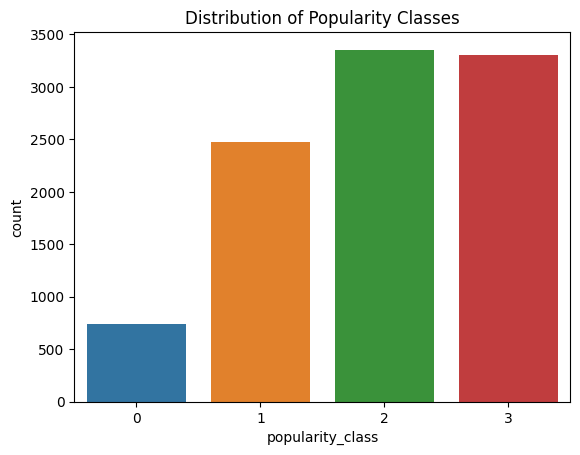

In [23]:
# Distribution of popularity classes
sns.countplot(x='popularity_class', data=df)
plt.title('Distribution of Popularity Classes')
plt.show()